You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

In [1]:
# importing relevant libraries
import pandas as pd
import numpy as np
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

# Pre-Processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

# Model
from sklearn.linear_model import LogisticRegression

# Metric libraries
from sklearn.metrics import accuracy_score, plot_confusion_matrix, cohen_kappa_score

# Imbalance Libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks


In [2]:
# Creating dataframe 'churnData'
churndata = pd.read_csv('Customer-Churn.csv')
churndata.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [3]:
# Cleaning headers to all lower case
churndata.columns = churndata.columns.str.lower()
print(churndata.columns)

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')


In [4]:
# Checking datatypes of all columns
churndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   int64  
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   phoneservice      7043 non-null   object 
 6   onlinesecurity    7043 non-null   object 
 7   onlinebackup      7043 non-null   object 
 8   deviceprotection  7043 non-null   object 
 9   techsupport       7043 non-null   object 
 10  streamingtv       7043 non-null   object 
 11  streamingmovies   7043 non-null   object 
 12  contract          7043 non-null   object 
 13  monthlycharges    7043 non-null   float64
 14  totalcharges      7043 non-null   object 
 15  churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [5]:
# Converting totalcharges from object to numeric
churndata['totalcharges'] = pd.to_numeric(churndata['totalcharges'], errors = 'coerce')

In [6]:
# Checking to make sure conversion worked
churndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   int64  
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   phoneservice      7043 non-null   object 
 6   onlinesecurity    7043 non-null   object 
 7   onlinebackup      7043 non-null   object 
 8   deviceprotection  7043 non-null   object 
 9   techsupport       7043 non-null   object 
 10  streamingtv       7043 non-null   object 
 11  streamingmovies   7043 non-null   object 
 12  contract          7043 non-null   object 
 13  monthlycharges    7043 non-null   float64
 14  totalcharges      7032 non-null   float64
 15  churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

In [7]:
# Checking for null values in dataframe
churndata.isna().sum()

gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

- Notice 11 NaN values in totalcharges column. I will use the mean of 'totalcharges' to fill these out

In [8]:
# Creating variable 'mean' and will be mean of totalcharges feature
# Will use fillna function to replace NaN values
mean = np.mean(churndata['totalcharges'])

churndata['totalcharges'] = churndata['totalcharges'].fillna(mean)

churndata.isna().sum() # Checking to make sure NaN's have been removed

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [9]:
# Setting up 2 dataframes with numerical features - tenure, seniorcitizen, monthlycharges, and totalcharges
# churnNum - to provide headers back to churnNums after preProcessing
# churnNumS - to be used for PreProcessing
churnNum = churndata[['tenure','seniorcitizen','monthlycharges','totalcharges']].copy()
churnNumS = churndata[['tenure','seniorcitizen','monthlycharges','totalcharges']].copy() # For standard scaler
churnNumS.head() # Header Check

,tenure,seniorcitizen,monthlycharges,totalcharges
0,1,0,29.85,29.85
1,34,0,56.95,1889.50
2,2,0,53.85,108.15
3,45,0,42.30,1840.75
4,2,0,70.70,151.65


# PreProcessing - StandardScaler & Normalizer

In [10]:
# Using StandarScaler & Normalizer to scale data (Doing both now to see if there is any significant change) 
scaler = StandardScaler()
scaler.fit(churnNumS)
churnNumS = scaler.transform(churnNumS)


In [11]:
# Splitting the dataset into train and test

X = churnNumS
y = churndata['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Running the Logistics Regression Model

The Kappa of your model is: 0.42
The accuracy of your model is:  0.7936583057264552


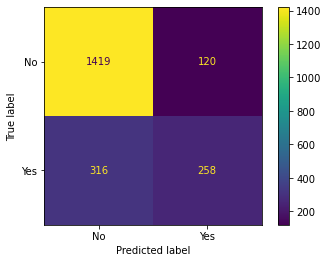

In [12]:
# Running the Logistic Regression Model 
clf = LogisticRegression(random_state = 42, max_iter = 500).fit(X_train, y_train)
predictions = clf.predict(X_test)

# Model Metrics using cohen_kappa and accuracy score
plot_confusion_matrix(clf, X_test, y_test)
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, predictions)))
print("The accuracy of your model is: ", accuracy_score(y_test, predictions))


In [13]:
# Checking for imbalance of the model
churndata['churn'].value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

- Decent accuracy score of the model but low Kappa. Checking for the imbalance you can see that churn is heavily favoured to No's in the model

# Imbalance Fixes - SMOTE

In [14]:
# Creating df for SMOTE specifically


X_smote = pd.DataFrame(X, columns = churnNum.columns)
y_smote = pd.DataFrame(y)
churnsmt = pd.concat([X_smote,y_smote], axis = 1) # 'churnsmt' to indicate this will be used specifically for SMOTE

# Creating 'smote' variable with SMOTE function
smote = SMOTE()
ys = churnsmt['churn']
Xs = churnsmt.drop(['churn'], axis = 1)

# fitting smote on Xs and Ys
X_sm, y_sm = smote.fit_sample(Xs, ys)

unique, counts = np.unique(y_sm, return_counts = True)

print(np.asarray((unique, counts)).T)

[['No' 5174]
 ['Yes' 5174]]


In [15]:
# splitting the churnsmt into test and train
Xse_train, Xse_test, yse_train, yse_test = train_test_split(X_sm, y_sm, test_size = 0.3, random_state = 42)

The Kappa of your model is: 0.49
The accuracy of your model is:  0.7468599033816425


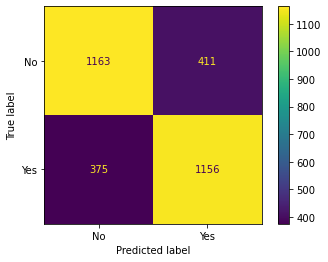

In [16]:
# Running Logistic Regression on SMOTE data
clf = LogisticRegression(random_state = 42, max_iter = 500).fit(Xse_train, yse_train)
predictions = clf.predict(Xse_test)

# Model Metrics using cohen_kappa and accuracy score
plot_confusion_matrix(clf, Xse_test, yse_test)
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(yse_test, predictions)))
print("The accuracy of your model is: ", accuracy_score(yse_test, predictions))

#Note
- Increase in both accuracy score (0.75) and kappa score( compared to all previous models

# SMOTE - Running decision tree classifier to fit model

In [17]:
# Importing libraries
from sklearn.tree import DecisionTreeClassifier

The Kappa of your model is: 0.49
The accuracy of your model is:  0.7468599033816425


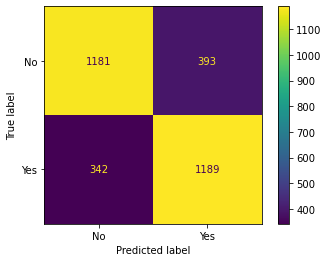

In [18]:
# Fitting SMOTE train and test with DecisionTreeRegressor
DTC = DecisionTreeClassifier() # Creating variable for DecisionsTreeRegressor function
DTC.fit(Xse_train, yse_train) 

plot_confusion_matrix(DTC, Xse_test, yse_test)
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(yse_test, predictions)))
print("The accuracy of your model is: ", accuracy_score(yse_test, predictions))

# Imbalance Fixes - TomekLinks

In [19]:
# Creating df for TomekLinks
X_Tome = pd.DataFrame(X, columns = churnNum.columns)
y_Tome = pd.DataFrame(y)
churntome = pd.concat([X_Tome,y_Tome], axis = 1) # 'churntome' to indicate this will be used specifically for TomekLinks

# creating tl variable for TomekLinks funtions
tl = TomekLinks('majority')

# y and x variable for model
yt = churntome['churn']
Xt = churntome.drop(['churn'], axis = 1)

# fitting yt and Xt
X_tl, y_tl = tl.fit_sample(Xt, yt)

unique, counts = np.unique(y_tl, return_counts = True)

print(np.asarray((unique, counts)).T)

[['No' 4666]
 ['Yes' 1869]]


C:\Users\sogun\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=majority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


In [20]:
# Splitting into test and train
Xkl_train, Xkl_test, ykl_train, ykl_test = train_test_split(X_tl, y_tl, test_size = 0.3, random_state = 42)

The Kappa of your model is: 0.47
The accuracy of your model is:  0.7960224375318715


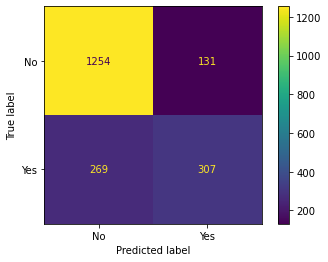

In [21]:
# Running Logistic Regression on SMOTE data
clf = LogisticRegression(random_state = 42, max_iter = 500).fit(Xkl_train, ykl_train)
predictions = clf.predict(Xkl_test)

# Model Metrics using cohen_kappa and accuracy score
plot_confusion_matrix(clf, Xkl_test, ykl_test)
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(ykl_test, predictions)))
print("The accuracy of your model is: ", accuracy_score(ykl_test, predictions))

#Note
- Best accurarcy score but kappa score is higher than downsampling and upsampling, but lower than SMOTE kappa

# Running TomekLinks with Decision Tree Classfier

The Kappa of your model is: 0.47
The accuracy of your model is:  0.7960224375318715


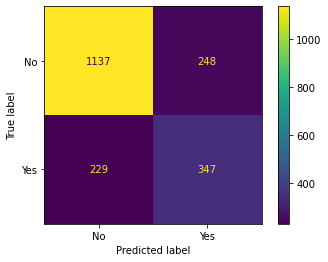

In [22]:
# Fitting SMOTE train and test with DecisionTreeRegressor
DTC = DecisionTreeClassifier() # Creating variable for DecisionsTreeRegressor function
DTC.fit(Xkl_train, ykl_train) 

plot_confusion_matrix(DTC, Xkl_test, ykl_test)
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(ykl_test, predictions)))
print("The accuracy of your model is: ", accuracy_score(ykl_test, predictions))